#**Week 3: Exploratory Data Analysis (EDA) and Visualization II**

For this week, we'll be spending time exploring another set of data. Let's take a look.

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/millenopan/Cardiovascular-Health-Project/blob/main/processed-cleveland.csv?raw=true'
hd = pd.read_csv(url)
hd.target = hd.target.replace({2:1, 3:1, 4:1}) 
url = 'https://github.com/millenopan/Cardiovascular-Health-Project/blob/main/heart-failure.csv?raw=true'
hf = pd.read_csv(url)

The data has now been imported for you, where the CSV file is stored under the variable 'hf' for 'heart-failure'.

In [ ]:
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
hf.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

-----------------------------

A lot of the skills and tools can be applied for this week's content as well, so for this walkthrough the majority of what is shown will be rather similar.

In [ ]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Let's start by looking at the distribution of age for this study.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



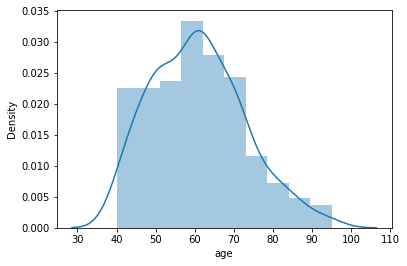

In [ ]:
sns.distplot(hf['age']);

Notice that for this study, the distribution of age is a bit different compared to our previous dataset. Let's take a look at the numbers.

In [ ]:
hf['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [ ]:
hd['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

--------------------------------

Let's explore how gender might affect the age at which heart failure happens for these people.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


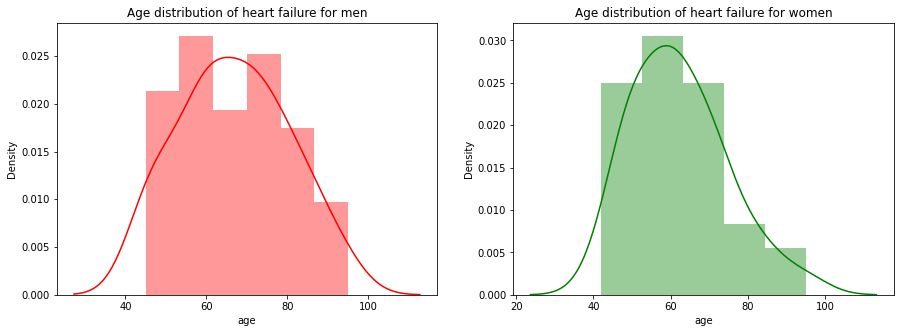

In [ ]:
f= plt.figure(figsize=(15,5))
hff = hf.copy() #excuse my slightly wonky variable naming
hff = hff[hff.DEATH_EVENT == 1]
hff_m = hff[hff.sex == 1]
hff_f = hff[hff.sex == 0]

ax=f.add_subplot(121)

sns.distplot(hff_m["age"],color='r',ax=ax)
ax.set_title('Age distribution of heart failure for men')

ax=f.add_subplot(122)
sns.distplot(hff_f["age"],color='g',ax=ax)
ax.set_title('Age distribution of heart failure for women');

Let's take a closer look at the distributions above with their quantitative values.

In [ ]:
print("Age of heart failure for men:")
hff_m["age"].describe()

Age of heart failure for men:


count    62.000000
mean     66.881726
std      13.482374
min      45.000000
25%      58.250000
50%      66.500000
75%      75.000000
max      95.000000
Name: age, dtype: float64

In [ ]:
print("Age of heart failure for women:")
hff_f["age"].describe()

Age of heart failure for women:


count    34.000000
mean     62.176471
std      12.327527
min      42.000000
25%      50.750000
50%      60.000000
75%      70.000000
max      95.000000
Name: age, dtype: float64

Although we see that age is somewhat similar overall, the distribution is different, and the most important part of this is that we have nearly double the amount of heart failures in our dataset for men compared to women. This seems to suggest that although the age at which heart failure occurs is similar, the overall frequency of this happening is likely much higher for men mostly across the ages.

--------------------------

Since the title of the research paper this dataset came from suggests that serum creatinine is closely related to heart failure, and we can see that from calling hf.corr(), let's see if we can try to provide new visualizations to highlight this relationship.

In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff  # you might want to explore a bit more on plotly as well for different visualization techniques!

hfn_s = hf[hf.DEATH_EVENT == 0]['serum_creatinine']
hff_s = hf[hf.DEATH_EVENT == 1]['serum_creatinine']
hist = [hfn_s, hff_s]
group_labels = ['No Heart Failure', 'Heart Failure']
fig = ff.create_distplot(hist, group_labels, bin_size=0.25)
fig.update_layout(title_text="Serum Creatinine on Heart Failure Survival")

It seems that an increase in serum creatinine relates closely with the increased chance of heart failure for the patients.

-------------------------

Finally, let's see how some categorical variables could potentially impact this, such as anaemia.

In [ ]:
base_ratio = hf['DEATH_EVENT'].value_counts(normalize=True)*100
print("Percentage of patients with no heart failure: " + str(round(base_ratio[0], 2)))
print("Percentage of patients with heart failure: " + str(round(base_ratio[1], 2)) + '\n')

anaemia = hf[(hf['anaemia'] == 1)]
anaemia = anaemia['DEATH_EVENT'].value_counts(normalize=True)*100
print("Percentage of patients with anaemia and no heart failure: " + str(round(anaemia[0], 2)))
print("Percentage of patients with anaemia and heart failure: " + str(round(anaemia[1], 2)) + '\n')

no_anaemia = hf[(hf['anaemia'] == 0)]
no_anaemia = no_anaemia['DEATH_EVENT'].value_counts(normalize=True)*100
print("Percentage of patients with no anaemia and no heart failure: " + str(round(no_anaemia[0], 2)))
print("Percentage of patients with no anaemia and heart failure: " + str(round(no_anaemia[1], 2)))

Percentage of patients with no heart failure: 67.89
Percentage of patients with heart failure: 32.11

Percentage of patients with anaemia and no heart failure: 64.34
Percentage of patients with anaemia and heart failure: 35.66

Percentage of patients with no anaemia and no heart failure: 70.59
Percentage of patients with no anaemia and heart failure: 29.41


The data we've found here seems to make sense, as anemia is a condition where you have a deficiency in red blood cells.

In [ ]:
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
hf["ejection_fraction"].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'ejection fraction distribution of people without heart failure')

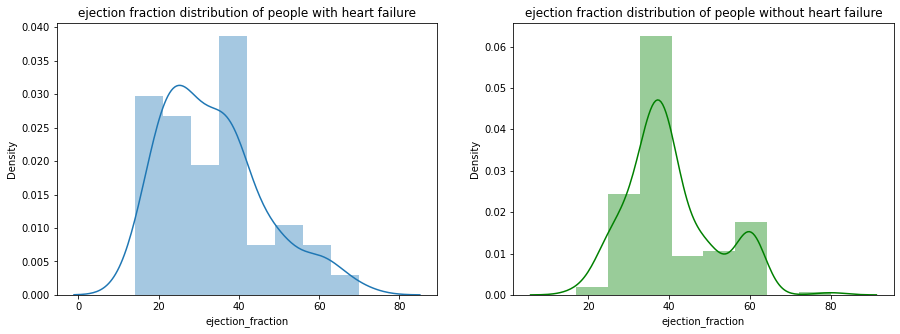

In [ ]:

g= plt.figure(figsize=(15,5))

death=hf[hf["DEATH_EVENT"]==1]

cx=g.add_subplot(121)
sns.distplot(death['ejection_fraction'],bins=8,ax=cx)#ejection fraction distribution of people who had heart failure
cx.set_title('ejection fraction distribution of people with heart failure')

bx=g.add_subplot(122)
alive=hf[hf["DEATH_EVENT"]==0]

sns.distplot(alive['ejection_fraction'],color='g',bins=8,ax=bx) #ejection fraction distribution of people who have not had heart failure
bx.set_title('ejection fraction distribution of people without heart failure')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'platelets distribution of people without heart failure')

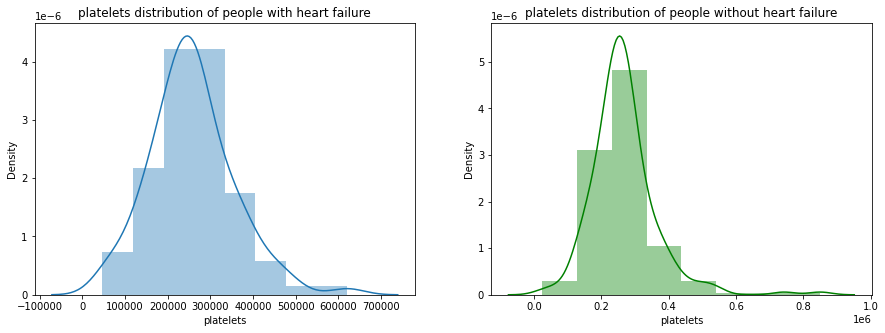

In [ ]:
h=plt.figure(figsize=(15,5))


dx=h.add_subplot(121)
sns.distplot(death['platelets'],bins=8,ax=dx) #platelets distribution of people who had heart failure
dx.set_title('platelets distribution of people with heart failure')

ex=h.add_subplot(122)
sns.distplot(alive['platelets'],color='g',bins=8,ax=ex) #platelets distribution of people who have not had heart failure
ex.set_title('platelets distribution of people without heart failure')

In [ ]:
hf['platelets'].describe()


count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

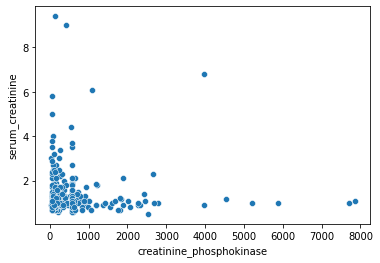

In [ ]:
sns.scatterplot(data=hf,x='creatinine_phosphokinase',y='serum_creatinine')

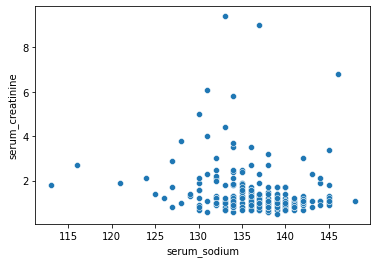

In [ ]:
sns.scatterplot(data=hf,x='serum_sodium',y='serum_creatinine')